X shape: (17631, 30, 24)
y shape: (17631,)


c:\Users\OWN\Documents\CIS\My Projects\predictive-maintenance-cmapss\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │        78,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,809 (499.25 KB)

 Trainable params: 127,809 (499.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - loss: 5867.1025 - val_loss: 4935.7051
Epoch 2/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 4268.3267 - val_loss: 3706.3513
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 3259.5310 - val_loss: 2888.3176
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - loss: 2613.6562 - val_loss: 2370.8242
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - loss: 2214.6614 - val_loss: 2064.7793
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - loss: 1986.7596 - val_loss: 1899.5800
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - loss: 1872.7947 - val_loss: 1816.5377
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - loss: 1818.8315 - val_loss: 1778.4771
Epoch 9/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - loss: 1801.0018 - val_loss: 1763.8412
Epoch 10/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 27s 121ms/step - loss: 1789.1770 - val_loss: 1758.2367
Epoch 11/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 21s 9

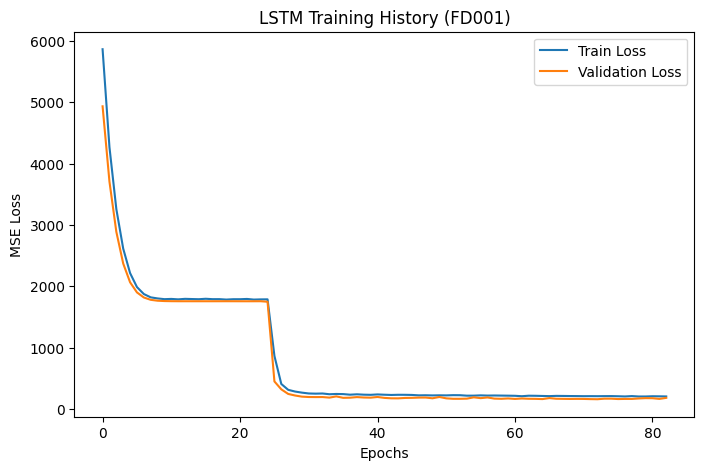

✅ LSTM model saved to ../models/lstm_fd001.h5
X_test: (100, 30, 24)
y_test: (100,)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
✅ Test FD001 → RMSE: 13.86, MAE: 10.24, R²: 0.880
✅ LSTM results saved to ../results/lstm_fd001_results.csv


In [21]:
# 04_deep_learning_models.ipynb

# =========================
# Imports
# =========================
import numpy as np
import pandas as pd
import os
import math
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# =========================
# Parameters
# =========================
SEQ_LEN = 30
DATA_DIR = "../data/raw/"
PROCESSED_DIR = "../data/processed/"

# =========================
# Load processed training data
# =========================
X = np.load(os.path.join(PROCESSED_DIR, "X_train_fd001.npy"))
y = np.load(os.path.join(PROCESSED_DIR, "y_train_fd001.npy"))

print("X shape:", X.shape)  # (samples, seq_len, num_features)
print("y shape:", y.shape)

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# Build LSTM model
# =========================
seq_len = X_train.shape[1]
num_features = X_train.shape[2]

model = Sequential([
    LSTM(128, input_shape=(seq_len, num_features), return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# =========================
# Train model
# =========================
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# =========================
# Evaluate on validation set
# =========================
y_pred_val = model.predict(X_val).flatten()

rmse_val = math.sqrt(mean_squared_error(y_val, y_pred_val))
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"Validation FD001 → RMSE: {rmse_val:.2f}, MAE: {mae_val:.2f}, R²: {r2_val:.3f}")

# Plot training history
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('LSTM Training History (FD001)')
plt.legend()
plt.show()

# =========================
# Save model
# =========================
os.makedirs("../models", exist_ok=True)
model.save("../models/lstm_fd001.h5")
print("✅ LSTM model saved to ../models/lstm_fd001.h5")

# =========================
# Evaluate on official test set
# =========================
# Load test data
test_file = os.path.join(DATA_DIR, "test_FD001.txt")
rul_file = os.path.join(DATA_DIR, "RUL_FD001.txt")

sensor_cols = [f'sensor_{i}' for i in range(1, 22)]
op_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3']
cols = ['engine_id', 'cycle'] + op_cols + sensor_cols

test_df = pd.read_csv(test_file, sep=' ', header=None)
test_df = test_df.dropna(axis=1, how='all')
test_df.columns = cols

truth_df = pd.read_csv(rul_file, header=None)
truth_df.columns = ['RUL']

# Compute true RULs
max_cycles = test_df.groupby('engine_id')['cycle'].max().reset_index()
max_cycles.columns = ['engine_id','max_cycle']
max_cycles = max_cycles.merge(truth_df, left_index=True, right_index=True)
max_cycles['true_last_rul'] = max_cycles['RUL'] + max_cycles['max_cycle']
test_df = test_df.merge(max_cycles[['engine_id','true_last_rul']], on='engine_id')
test_df['RUL'] = test_df['true_last_rul'] - test_df['cycle']

# Apply same capping
test_df['RUL'] = test_df['RUL'].clip(upper=125)

# Reload saved scaler and apply
scaler = joblib.load(os.path.join(PROCESSED_DIR, "scaler_fd001.pkl"))
test_df[op_cols + sensor_cols] = scaler.transform(test_df[op_cols + sensor_cols])

# Sequence generator
def gen_sequence(df, seq_length, features):
    data_array = df[features].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements - seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

# Build test sequences (last sequence per engine)
feature_cols = op_cols + sensor_cols
X_test, y_test = [], []
for eid in test_df['engine_id'].unique():
    engine_df = test_df[test_df['engine_id']==eid]
    seqs = list(gen_sequence(engine_df, SEQ_LEN, feature_cols))
    if len(seqs) > 0:
        X_test.append(seqs[-1])
        y_test.append(engine_df['RUL'].values[-1])

X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Predict on test set
y_pred_test = model.predict(X_test).flatten()

rmse_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"✅ Test FD001 → RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, R²: {r2_test:.3f}")

# Save results
os.makedirs("../results", exist_ok=True)
df_lstm = pd.DataFrame([{
    "Model": "LSTM",
    "RMSE_val": rmse_val, "MAE_val": mae_val, "R2_val": r2_val,
    "RMSE_test": rmse_test, "MAE_test": mae_test, "R2_test": r2_test
}])
df_lstm.to_csv("../results/lstm_fd001_results.csv", index=False)
print("✅ LSTM results saved to ../results/lstm_fd001_results.csv")
